In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('diabetes.csv')
data.head()
data.shape



(768, 9)

In [ ]:
# Tạo các đặc trưng
features = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']

In [ ]:


X = data[features]

y = data["Outcome"]



In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6,148,72,35,0,33.6,50
1,1,85,66,29,0,26.6,31
2,8,183,64,0,0,23.3,32
3,1,89,66,23,94,28.1,21
4,0,137,40,35,168,43.1,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# Chia dữ liệu
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8,test_size=0.2)




In [ ]:
# Mô hình Bayes
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

pd.DataFrame({'Thực tế  ' : y_test ,'Dự đoán':y_pred })



,Thực tế,Dự đoán
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


In [ ]:
print("Độ chính xác của mô hình: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Độ chính xác của mô hình: 78.57%


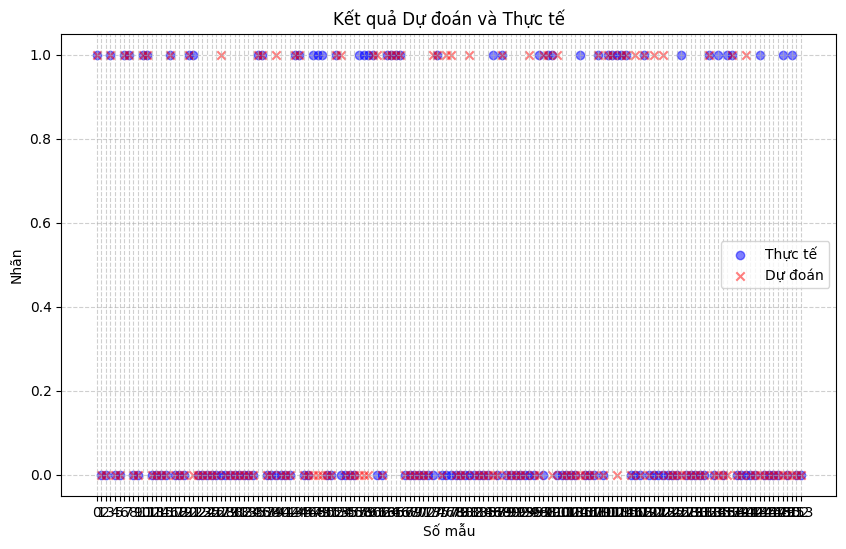

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Thực tế', marker='o', color='b', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, label='Dự đoán', marker='x', color='r', alpha=0.5)
plt.xlabel('Số mẫu')
plt.ylabel('Nhãn')
plt.legend()
plt.title('Kết quả Dự đoán và Thực tế')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(len(y_test)))
plt.show()

In [ ]:
def predict_new_patient(model):
    # Hàm nhập thông tin cho bệnh nhân mới
    def input_new_patient_info():
        print("Nhập thông tin cho bệnh nhân mới:")
        pregnancies = int(input("Số lần mang thai: "))
        glucose = int(input("Nồng độ glucose trong huyết thanh (mg/dL): "))
        blood_pressure = int(input("Huyết áp (mm Hg): "))
        skin_thickness = int(input("Độ dày da (mm): "))
        insulin = int(input("Insulin (mu U/ml): "))
        bmi = float(input("Chỉ số BMI: "))
        age = int(input("Tuổi: "))

        return [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, age]

    # Hàm dự đoán cho bệnh nhân mới
    new_patient_info = input_new_patient_info()
    prediction = model.predict([new_patient_info])
    if prediction[0] == 0:
        result = "Không mắc bệnh"
    else:
        result = "Mắc bệnh"

    return result

# Sử dụng hàm để dự đoán cho một bệnh nhân mới
predicted_result = predict_new_patient(model)
print("Dự đoán cho bệnh nhân mới:", predicted_result)


Nhập thông tin cho bệnh nhân mới:
Số lần mang thai: 22
Nồng độ glucose trong huyết thanh (mg/dL): 148
Huyết áp (mm Hg): 79
Độ dày da (mm): 30
Insulin (mu U/ml): 0
Chỉ số BMI: 33.4
Tuổi: 20
Dự đoán cho bệnh nhân mới: Mắc bệnh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


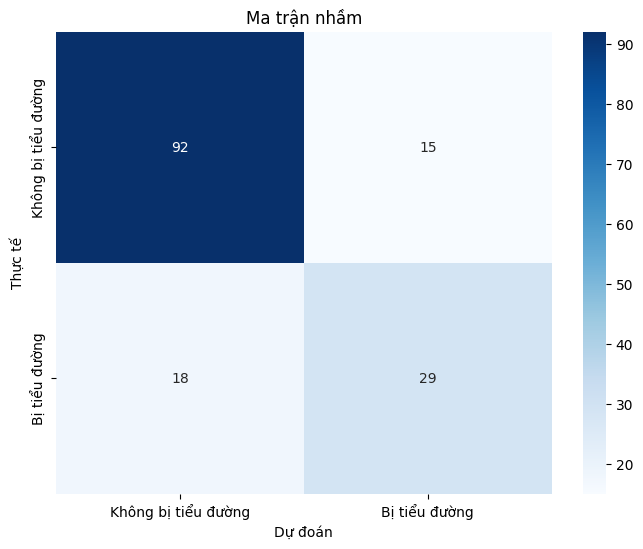

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tính ma trận nhầm
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không bị tiểu đường', 'Bị tiểu đường'],
            yticklabels=['Không bị tiểu đường', 'Bị tiểu đường'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm')
plt.show()